In [1]:
%load_ext autoreload

%autoreload 2

# New data

- preprocess the new data
- train it on just DNN
- then on CNN
- setup tensorboard for experiment tracking

# Preprocessing

In [3]:
import sklearn
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
data = {}
for folder in glob.glob("../data/*"):
    f_name = folder.split("\\")[1]
    if f_name not in data:
        n_files = glob.glob(f"{folder}\*.jpg")
        data[f_name] = len(n_files)
        print(f_name, len(n_files))


+ 25112
- 33997
div 868
rightarrow 1703
times 3251
u 1269
v 1558
w 556
y 9340
z 5870


In [5]:
sorted(data.items(), key = lambda x:x[1], reverse=True)

[('-', 33997),
 ('+', 25112),
 ('y', 9340),
 ('z', 5870),
 ('times', 3251),
 ('rightarrow', 1703),
 ('v', 1558),
 ('u', 1269),
 ('div', 868),
 ('w', 556)]

In [6]:
df = pd.DataFrame()
df["Distribution"] = list(data.values())
df["Classes"] = list(data.keys())

In [7]:
df.head()

,Distribution,Classes
0,25112,+
1,33997,-
2,868,div
3,1703,rightarrow
4,3251,times


In [8]:
df = df.sort_values("Distribution", ascending=False)

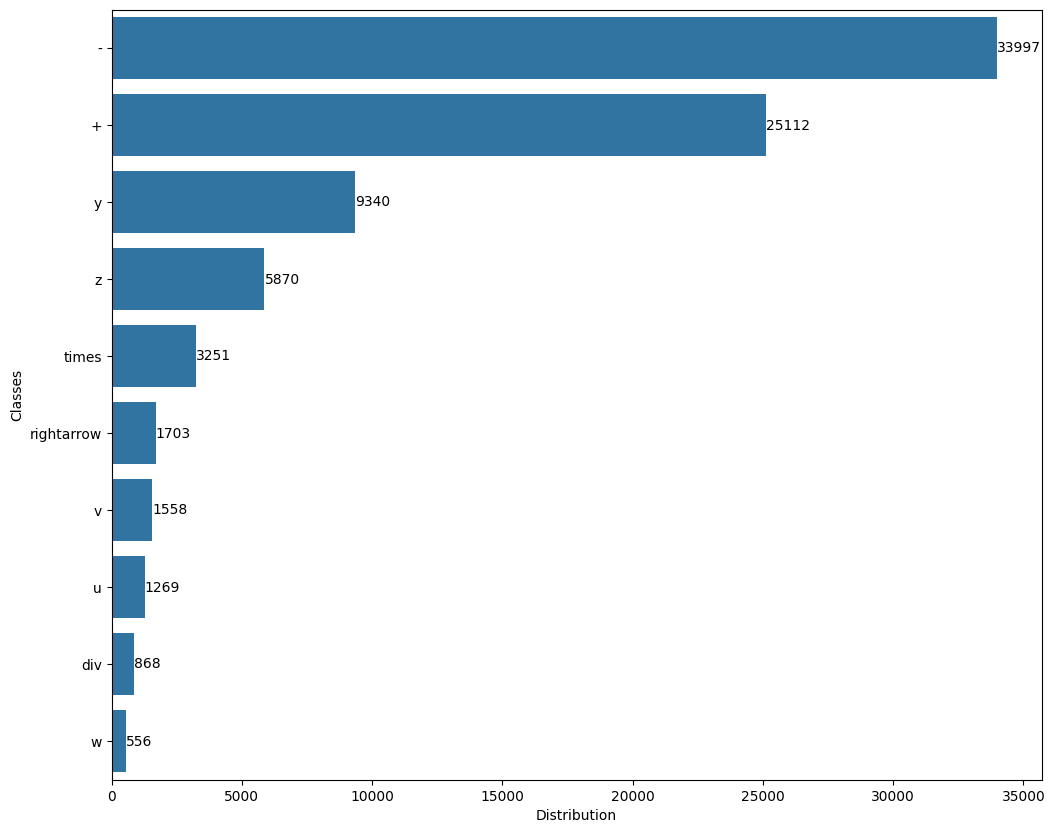

In [11]:
plt.figure(figsize=(12,10))
ax = sns.barplot(y="Classes", x="Distribution", data=df)
ax.bar_label(ax.containers[0])
plt.show()

In [12]:
labels = sorted(list(df["Classes"]))
labels_map = {label:10+index for index, label in enumerate(labels)}

In [13]:
labels_map

{'+': 10,
 '-': 11,
 'div': 12,
 'rightarrow': 13,
 'times': 14,
 'u': 15,
 'v': 16,
 'w': 17,
 'y': 18,
 'z': 19}

In [14]:
import cv2
import mnist

In [15]:
x_mnist_train, y_mnist_train, x_mnist_test, y_mnist_test = mnist.load()

x_mnist_train, x_mnist_test = x_mnist_train.reshape((x_mnist_train.shape[0],28, 28)), x_mnist_test.reshape((x_mnist_test.shape[0], 28, 28))

In [16]:

kernel = np.array([[0, -1, 0], [-1, 6, -1], [0, -1, 0]])
reshaped_x_train_mnist, reshaped_x_test_mnist = [], []


for img in x_mnist_train:
    img = cv2.resize(img, (55,55), cv2.INTER_CUBIC, fx=0.1, fy=0.1)
    img = cv2.filter2D(img, -1, kernel)
    reshaped_x_train_mnist.append(img)

for img in x_mnist_test:
    img = cv2.resize(img, (55,55), cv2.INTER_CUBIC, fx=0.1, fy=0.1)
    img = cv2.filter2D(img, -1, kernel)
    reshaped_x_test_mnist.append(img)

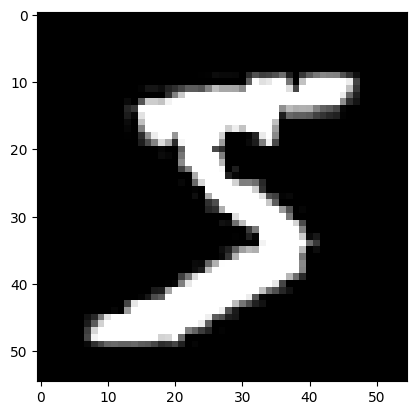

In [17]:
plt.imshow(reshaped_x_train_mnist[0], cmap="gray")

In [18]:
list(df["Classes"])

['-', '+', 'y', 'z', 'times', 'rightarrow', 'v', 'u', 'div', 'w']

In [20]:
import glob
import os
from pathlib import Path
import glob

# Specify the path to your dataset
images = []
labels = []
goodlabels = ["+","-","rightarrow","div","times","u","v","z","w","y"]
path = '../data/'

for label in os.listdir(path):
    if(label in goodlabels): 
        label_path = os.path.join(path,label)
        print(label_path)
        counter = 0
        for filename in os.listdir(label_path):
            if(counter > 7000):
                break
            counter = counter + 1
            img_path = os.path.join(label_path,filename)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.GaussianBlur(img, (5,5), 0)
            img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
            img = cv2.copyMakeBorder(img, 5, 5, 5, 5, cv2.BORDER_CONSTANT, value=0)
            img = cv2.dilate(img, np.ones((2,2), np.uint8), iterations=1)
            images.append(img)
            labels.append(labels_map[label])
# print(finalLabel)
# print(finalImage[0])


../data/+
../data/-
../data/div
../data/rightarrow
../data/times
../data/u
../data/v
../data/w
../data/y
../data/z


In [21]:
images = np.asarray(images)
labels = np.asarray(labels)

In [22]:
np.unique(labels, return_counts=True)

(array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
 array([7001, 7001,  868, 1703, 3251, 1269, 1558,  556, 7001, 5870],
       dtype=int64))

In [23]:
src = "../data/+/+_20.jpg"

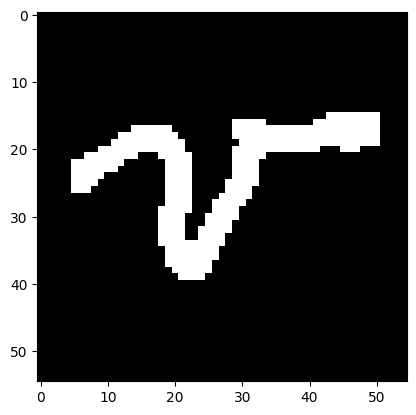

In [24]:
# img = cv2.imread(src)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# img = cv2.GaussianBlur(img, (5,5), 0)
# img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
# img = cv2.dilate(img, np.ones((2,2), np.uint8), iterations=1)
# img = cv2.resize(img, (45, 45))
# cv2.
# img = cv2.dilate(img, )
plt.imshow(images[21260], cmap="gray")


In [25]:
images = np.append(reshaped_x_train_mnist, images, axis=0)
images = np.append(images, reshaped_x_test_mnist, axis=0)

In [26]:
np.unique(labels, return_counts=True)

(array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
 array([7001, 7001,  868, 1703, 3251, 1269, 1558,  556, 7001, 5870],
       dtype=int64))

In [27]:
labels = np.append(y_mnist_train, labels, axis=0)
labels = np.append(labels, y_mnist_test, axis=0)

In [28]:
numbers_map = {label:idx for idx, label in enumerate(list("0123456789"))}
numbers_map.update(labels_map)

In [29]:
numbers_map

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 '+': 10,
 '-': 11,
 'div': 12,
 'rightarrow': 13,
 'times': 14,
 'u': 15,
 'v': 16,
 'w': 17,
 'y': 18,
 'z': 19}

Text(0.5, 0, '0')

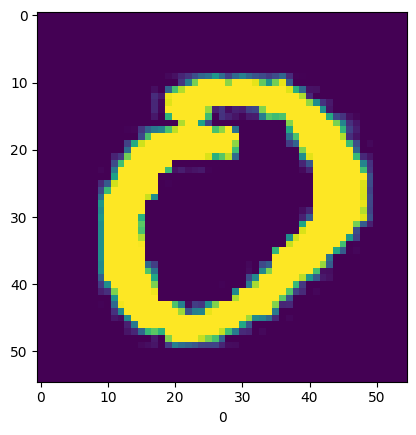

In [30]:
r = np.random.randint(labels.shape[0])
plt.imshow(images[r])
plt.xlabel(labels[r])

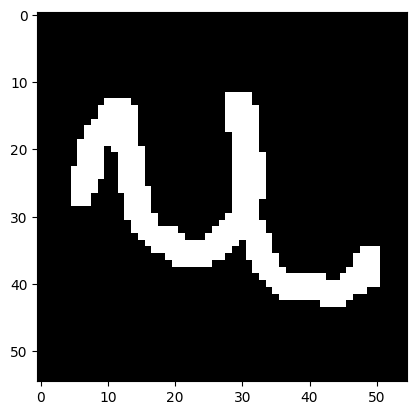

In [31]:
r = np.random.randint(len(images))
plt.imshow(images[r].reshape(55,55), cmap="gray")

In [32]:
np.unique(labels, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([6903, 7877, 6990, 7141, 6824, 6313, 6876, 7293, 6825, 6958, 7001,
        7001,  868, 1703, 3251, 1269, 1558,  556, 7001, 5870], dtype=int64))

In [33]:
from PIL import Image
from sklearn.model_selection import train_test_split

In [34]:
# Now here we will split the data into train test and validate
# basically we allocate 30% of data to test and validate
# now we will allocate 15% of total data to test and 15% of total data to validate
temp_X, X_test, temp_Y, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(temp_X, temp_Y, test_size=0.1, random_state=42)

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)
X_val, y_val = np.array(X_val), np.array(y_val)

# Now preprocessed_data contains your preprocessed images as NumPy arrays, and labels contain corresponding class labels
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(76375, 55, 55)
(21216, 55, 55)
(8487, 55, 55)


In [35]:
labels_map = numbers_map
print(labels_map)

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '+': 10, '-': 11, 'div': 12, 'rightarrow': 13, 'times': 14, 'u': 15, 'v': 16, 'w': 17, 'y': 18, 'z': 19}


In [36]:
np.unique(y_train, return_counts = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([4979, 5720, 5036, 5086, 4889, 4571, 4968, 5177, 4884, 4984, 5134,
        5021,  614, 1223, 2334,  918, 1132,  403, 5037, 4265], dtype=int64))

In [37]:
np.unique(y_test, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([1374, 1523, 1409, 1471, 1412, 1236, 1395, 1509, 1368, 1399, 1326,
        1416,  178,  345,  662,  263,  288,  104, 1358, 1180], dtype=int64))

In [38]:
np.unique(y_val, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([550, 634, 545, 584, 523, 506, 513, 607, 573, 575, 541, 564,  76,
        135, 255,  88, 138,  49, 606, 425], dtype=int64))

In [39]:
def idtolabel(labels_map, y):
    for key, value in labels_map.items():
        if y == value:
            return key
        
    return -1


6


Text(0.5, 0, '6')

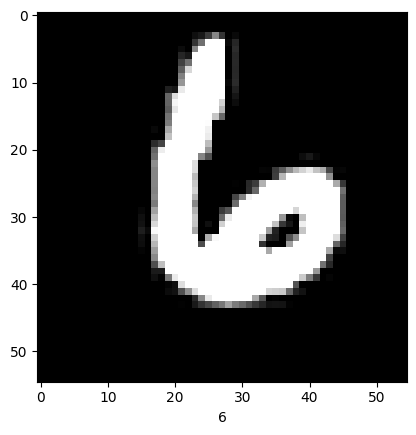

In [41]:
x_data, y_data = X_train, y_train
r = np.random.randint(0,len(x_data))
plt.imshow(x_data[r], cmap="gray")
print(y_data[r])
plt.xlabel(idtolabel(labels_map, y_data[r]))

# Model

In [42]:
import utils

In [43]:
X_train_preprocessed = X_train
y_train_preprocessed = y_train
X_train_preprocessed = np.expand_dims(X_train_preprocessed, axis=1)
X_train_preprocessed = utils.minmax_normalize(X_train_preprocessed)

X_val_preprocessed = X_val
y_val_preprocessed = y_val
X_val_preprocessed = np.expand_dims(X_val_preprocessed, axis=1)
X_val_preprocessed = utils.minmax_normalize(X_val_preprocessed)

X_test_preprocessed = X_test
y_test_preprocessed = y_test
X_test_preprocessed = np.expand_dims(X_test_preprocessed, axis=1)
X_test_preprocessed = utils.minmax_normalize(X_test_preprocessed)

(1, 55, 55)


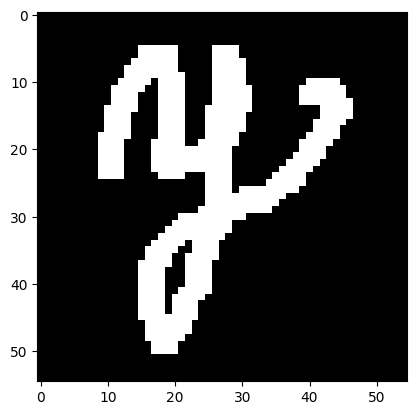

In [44]:
print(X_train_preprocessed[100].shape)

plt.imshow(X_train_preprocessed[100][0], cmap="gray")

In [45]:
X_train_preprocessed.shape

(76375, 1, 55, 55)

In [46]:
x_data.shape

(76375, 55, 55)

Text(0.5, 0, '-')

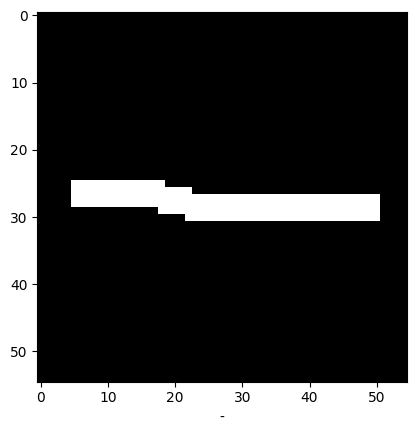

In [47]:
x_data, y_data = X_train_preprocessed, y_train_preprocessed
r = np.random.randint(0,len(x_data))
plt.imshow(x_data[r][0], cmap="gray")
plt.xlabel(idtolabel(labels_map, y_data[r]))

In [246]:
# from model import Sequential
# np.random.seed(42)


# conv_1 = ConvLayer("conv_1", n_filters = 10, filter_size = 3, stride = 1, debug=False)
# relu_1 = ReluLayer("relu_1")
# conv_2 = ConvLayer("conv_2", n_filters = 10, filter_size = 3, stride = 2, debug=False)
# relu_2 = ReluLayer("relu_2")
# flatten_1 = Flatten("flatten_1")
# dense_1 = DenseLayer("Dense_1", 4410, 84, debug=False)
# relu_3 = ReluLayer("relu_3")
# dense_2 = DenseLayer("Dense_2", 84, len(labels_map), debug=False)


# layers =  [conv_1, relu_1, conv_2, relu_2, flatten_1, dense_1, relu_3, dense_2]

# sequential_model = Sequential(layers)

In [875]:
# model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(45, 45, 1)))
# model.add(tf.keras.layers.MaxPool2D(strides=2))

# # Second Convolutional Block
# model.add(tf.keras.layers.Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
# model.add(tf.keras.layers.MaxPool2D(strides=2))

# # Classifier Head
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(256, activation='relu'))
# model.add(tf.keras.layers.Dense(84, activation='relu'))
# model.add(tf.keras.layers.Dense(7, activation='softmax'))

In [48]:
from model import Sequential
from layers.conv import ConvLayer
from layers.dense import DenseLayer
from layers.flatten import Flatten
from layers.maxpool import MaxPool
from layers.relu import ReluLayer

np.random.seed(42)


conv_1 = ConvLayer("conv_1", n_filters = 8, filter_size = 3, stride = 1, debug=False)
relu_1 = ReluLayer("relu_1")
max_1 = MaxPool("max_pool_1", 2, 2)

# conv_2 = ConvLayer("conv_2", n_filters = 12, filter_size = 5, stride = 1, debug=False)
relu_2 = ReluLayer("relu_2")
# max_2 = MaxPool("max_pool_2", 2, 2)

flatten_1 = Flatten("flatten_1")

dense_1 = DenseLayer("Dense_1", 22472, 256, debug=False)
relu_3 = ReluLayer("relu_3")

dense_2 = DenseLayer("Dense_2", 256, len(labels_map), debug=False)
# relu_4 = ReluLayer("relu_4")

# dense_3 = DenseLayer("Dense_3", 42, len(labels_map), debug=False)

layers = [conv_1, relu_1, flatten_1, dense_1, relu_2, dense_2]

sequential_model = Sequential(layers)


In [49]:
X_train.shape, X_val.shape

((76375, 55, 55), (8487, 55, 55))

In [50]:
X_val_preprocessed.shape

(8487, 1, 55, 55)

In [51]:
np.unique(y_train_preprocessed, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([4979, 5720, 5036, 5086, 4889, 4571, 4968, 5177, 4884, 4984, 5134,
        5021,  614, 1223, 2334,  918, 1132,  403, 5037, 4265], dtype=int64))

In [52]:
y_val_preprocessed.shape, X_val_preprocessed.shape

((8487,), (8487, 1, 55, 55))

In [54]:
x_mnist_train_c, x_mnist_test_c = np.expand_dims(x_mnist_train, axis=1), np.expand_dims(x_mnist_test, axis=1)

In [55]:
x_mnist_train_c, x_mnist_test_c  = utils.minmax_normalize(x_mnist_train_c), utils.minmax_normalize(x_mnist_test_c)

In [57]:
sequential_model._validate([X_val_preprocessed, y_val_preprocessed]) # without training

(7.046070460704606, 3.154323338456375)

In [59]:
sequential_model.train([X_train_preprocessed[:10000], y_train_preprocessed[:10000]], [X_val_preprocessed, y_val_preprocessed], 5, 16, True, 1e-01)

----------
Epoch 1
Epoch Progress 99.84 %, batch 624, batch loss 1.009106461758146, batch accuracy 87.5.75
Time 465.4432694911957 seconds
Train Accuracy 68.13, Validation accuracy 81.13585483680924
Train Loss 1.1899046287763642, Validation loss 0.682848634542151
----------
----------
Epoch 2
Epoch Progress 23.04 %, batch 144, batch loss 0.4054712343179264, batch accuracy 87.550

In [1223]:
sequential_model.test([X_test_preprocessed, y_test_preprocessed])

(87.13862452864069, 0.47024338961019846)

In [ ]:
sequential_model._forward()

In [156]:
conv_1.cached_output_activations.shape

(16, 8, 43, 43)

12

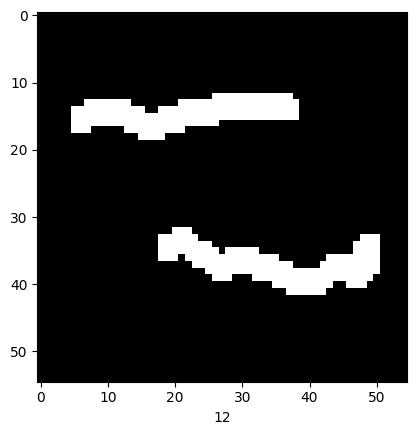

In [1290]:
idx = np.random.randint(0, X_test_preprocessed.shape[0])
test_image = utils.minmax_normalize(X_test_preprocessed[idx])

plt.imshow(test_image.reshape(55, 55), cmap="gray")
plt.xlabel(y_test_preprocessed[idx])

np.argmax(sequential_model._forward(np.expand_dims(test_image, 0)))

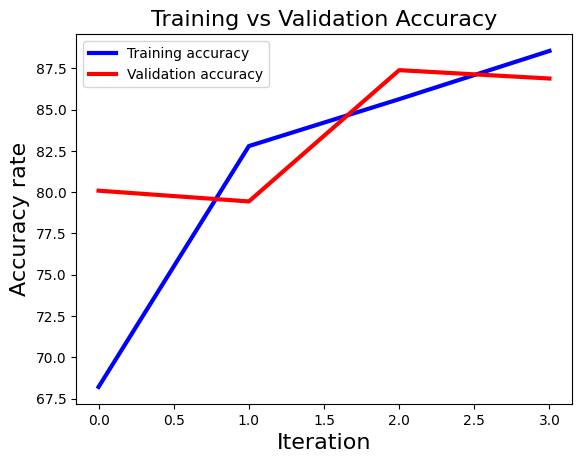

In [1273]:
utils.plot_accuracy_curve(sequential_model.train_accuracy, sequential_model.validation_accuracy)

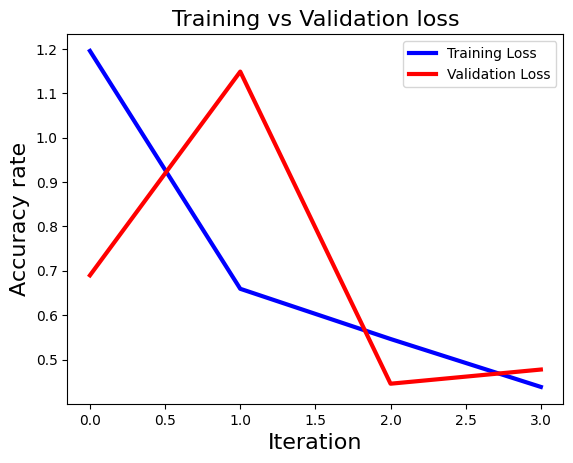

In [1274]:
utils.plot_loss_curve(sequential_model.train_loss, sequential_model.validation_loss)

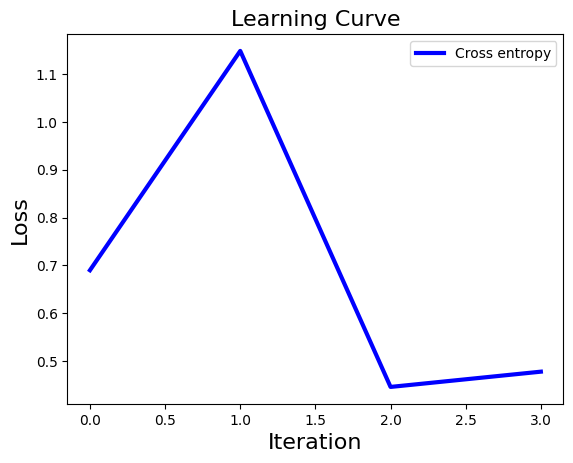

In [1275]:
utils.plot_learning_curve(sequential_model.validation_loss)


# Saving the model

In [1279]:
import time
time.strftime("%Y%m%d%H%M%S")

'20231126192358'

In [1286]:
import pickle



In [1288]:
save_model(sequential_model, "exp1_10k_train")

# Loading the saved model

In [62]:
import utils

In [63]:
loaded_sequential = utils.load_model("./models/exp1_10k_train_20231126193041.pkl")

12

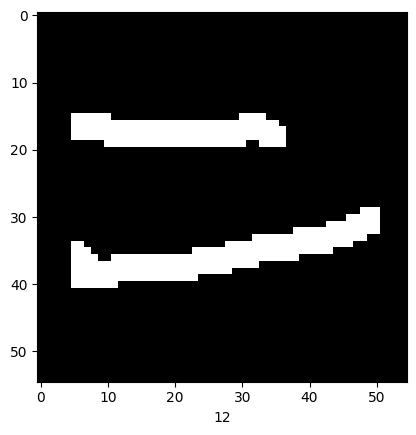

In [64]:
idx = np.random.randint(0, X_test_preprocessed.shape[0])
test_image = utils.minmax_normalize(X_test_preprocessed[idx])

plt.imshow(test_image.reshape(55, 55), cmap="gray")
plt.xlabel(y_test_preprocessed[idx])

np.argmax(loaded_sequential._forward(np.expand_dims(test_image, 0)))

# Metrics

### Confusion metrics

In [1312]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report

In [1299]:
y_test_predictions = sequential_model._forward(X_test_preprocessed)

In [1300]:
y_test_predictions.shape

(22276, 20)

In [1309]:
y_test_predictions =  np.argmax(y_test_predictions, axis=1)

In [1307]:
labels_map

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 '+': 10,
 '-': 11,
 '=': 12,
 'div': 13,
 'times': 14,
 'u': 15,
 'v': 16,
 'w': 17,
 'y': 18,
 'z': 19}

In [1315]:
target_names = list(labels_map.keys())

In [1314]:
target_names

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

Confusion Matrix:


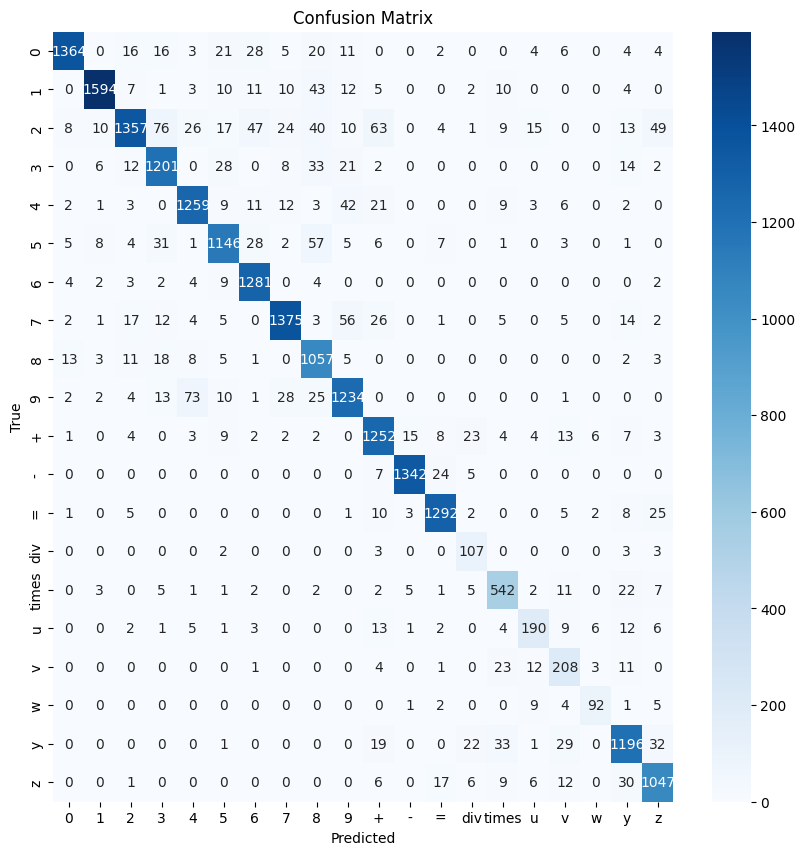

Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1402
           1       0.93      0.98      0.95      1630
           2       0.77      0.94      0.84      1446
           3       0.91      0.87      0.89      1376
           4       0.91      0.91      0.91      1390
           5       0.88      0.90      0.89      1274
           6       0.98      0.90      0.94      1416
           7       0.90      0.94      0.92      1466
           8       0.94      0.82      0.88      1289
           9       0.89      0.88      0.88      1397
           +       0.92      0.87      0.90      1439
           -       0.97      0.98      0.98      1367
           =       0.95      0.95      0.95      1361
         div       0.91      0.62      0.74       173
       times       0.89      0.84      0.86       649
           u       0.75      0.77      0.76       246
           v       0.79      0.67      0.72

In [1318]:
# Generate confusion matrix
cm = confusion_matrix(y_test_predictions, y_test_preprocessed)

# Print confusion matrix
print("Confusion Matrix:")

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test_predictions, y_test_preprocessed)
report = classification_report(y_test_preprocessed, y_test_predictions, target_names=target_names)

# Print accuracy and classification report
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)
